In [473]:
from keras import layers, models
from keras.datasets import reuters
import numpy as np

In [474]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [475]:
word_index = reuters.get_word_index()
word_index = dict([(value, key) for (key, value) in word_index.items()])
for _ in train_data[0]:
  print(word_index.get(_ -3))

None
None
None
said
as
a
result
of
its
december
acquisition
of
space
co
it
expects
earnings
per
share
in
1987
of
1
15
to
1
30
dlrs
per
share
up
from
70
cts
in
1986
the
company
said
pretax
net
should
rise
to
nine
to
10
mln
dlrs
from
six
mln
dlrs
in
1986
and
rental
operation
revenues
to
19
to
22
mln
dlrs
from
12
5
mln
dlrs
it
said
cash
flow
per
share
this
year
should
be
2
50
to
three
dlrs
reuter
3


In [476]:
def vectorizar(sequences, dim=10000):
  results = np.zeros((len(sequences),dim))
  for i, sequences in enumerate(sequences):
    results[i,sequences]=1
  return results

In [477]:
x_train = vectorizar(train_data)
x_test = vectorizar(test_data)

In [478]:
from tensorflow.keras.utils import to_categorical

In [479]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [480]:
model = models.Sequential()
model.add(layers.Dense(225, activation="relu", input_shape= (10000,),
                        kernel_regularizer= regularizers.l2(0.0001)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(225, activation="relu", kernel_regularizer= regularizers.l2(0.0001)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(46, activation="softmax"))


In [481]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [482]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [483]:
history = model.fit(partial_x_train, partial_y_train,
          epochs=15,
          batch_size=512,
          validation_data=(x_val, y_val))

Epoch 1/15
16/16 [==============================] - 1s 36ms/step - loss: 2.3440 - accuracy: 0.4883 - val_loss: 1.5049 - val_accuracy: 0.6690
Epoch 2/15
16/16 [==============================] - 0s 24ms/step - loss: 1.4393 - accuracy: 0.6833 - val_loss: 1.2410 - val_accuracy: 0.7230
Epoch 3/15
16/16 [==============================] - 0s 22ms/step - loss: 1.1697 - accuracy: 0.7477 - val_loss: 1.1055 - val_accuracy: 0.7620
Epoch 4/15
16/16 [==============================] - 0s 22ms/step - loss: 0.9843 - accuracy: 0.7876 - val_loss: 1.0461 - val_accuracy: 0.7840
Epoch 5/15
16/16 [==============================] - 0s 22ms/step - loss: 0.8367 - accuracy: 0.8210 - val_loss: 0.9911 - val_accuracy: 0.8010
Epoch 6/15
16/16 [==============================] - 0s 21ms/step - loss: 0.7360 - accuracy: 0.8415 - val_loss: 0.9494 - val_accuracy: 0.8110
Epoch 7/15
16/16 [==============================] - 0s 22ms/step - loss: 0.6430 - accuracy: 0.8636 - val_loss: 0.9374 - val_accuracy: 0.8230
Epoch 8/15
16

<function matplotlib.pyplot.show>

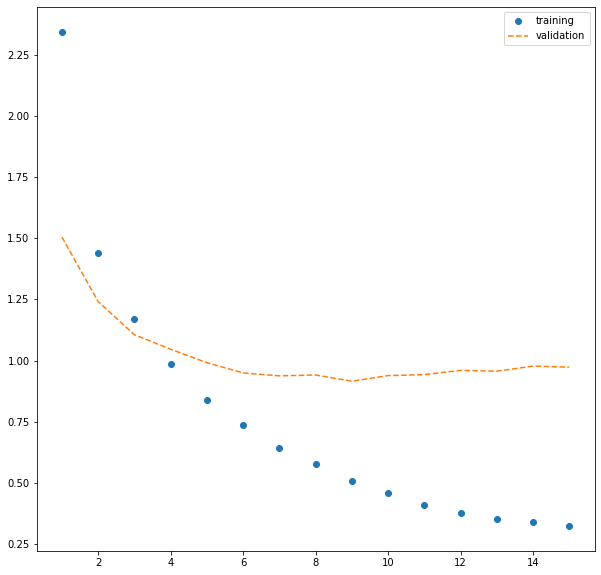

In [484]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]

fig = plt.figure(figsize=(10,10))
epoch = range(1,len(loss_values)+1)
plt.plot(epoch, loss_values, "o", label = "training")
plt.plot(epoch, val_loss_values, "--", label = "validation")
plt.legend()
plt.show

<function matplotlib.pyplot.show>

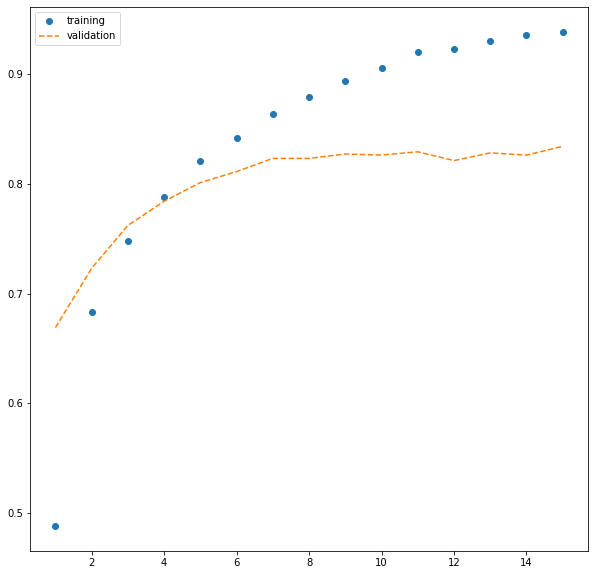

In [485]:
history_dict = history.history
loss_values = history_dict["accuracy"]
val_loss_values = history_dict["val_accuracy"]

fig = plt.figure(figsize=(10,10))
epoch = range(1,len(loss_values)+1)
plt.plot(epoch, loss_values, "o", label = "training")
plt.plot(epoch, val_loss_values, "--", label = "validation")
plt.legend()
plt.show

In [486]:
model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 4ms/step - loss: 1.1195 - accuracy: 0.8059


[1.1194812059402466, 0.8058770895004272]